Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Cleversys_Parser_wms as cp
import behavior_miniscope as bm

Point to the path containing your cleversys .txt file

In [2]:
cleversys_txt = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\cleversys\\result\\220831\\220821_mergedVideo_TCR.txt"
print(cleversys_txt)

\\penc8.rc.int.colorado.edu\DonaldsonLab\Sheeran\cleversys\result\220831\220821_mergedVideo_TCR.txt


In [ ]:
#note to self - write fxn into bm to determine whether this is a social file or a non-social (solo) file 
#- maybe include into ms_parse as if statement calling cp.parse() or cp.solo_parse() depending on which is appropriate

Parse cleversys .txt file into frame-by-frame df containing tracked data of interest (can change which columns are included in the ms_parse fxn in timestamp_align.py).

This df will be 1) imported into Bento for alignment with behavioral/neural data (e.g., videos, manual annotations, other sources of data input) and incorporation into a .annot file, and 2) also aligned with neural data in this notebook to generate some more frame-by-frame booleans for input into Bento (and, if you prefer, you can use this df to run all of your analysis outside of Bento)

In [3]:
#will take a bit of time

#choose the appropriate fxn for whether solo animal or not

parsed_cs = bm.ms_parse_solo(cleversys_txt, "cam2") 
#parsed_cs = bm.ms_parse(cleversys_txt, "cam2") #the second argument is the name of the minicam whose video you analyzed in cleversys

print(parsed_cs)

       CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  EventRule1  EventRule2  \
0            561.0        235.0      512.0      214.0           0           0   
1            562.0        234.0      512.0      214.0           0           0   
2            561.0        234.0      512.0      215.0           0           0   
3            561.0        234.0      512.0      215.0           0           0   
4            561.0        235.0      512.0      214.0           0           0   
...            ...          ...        ...        ...         ...         ...   
56335        756.0        270.0      815.0      279.0           0           0   
56336        753.0        273.0      816.0      279.0           0           0   
56337        753.0        272.0      816.0      279.0           0           0   
56338        753.0        272.0      816.0      281.0           0           0   
56339        753.0        272.0      816.0      280.0           0           0   

       EventRule3  EventRul

Import and align all feeds' timestamp files

In [4]:
#point to paths containing timestamp files from each feed
ts_dir = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\analyzed\\5001\\2022_08_31-seperate-trials\\11_35_05\\220831_emptychamber1_1"

scope_dir = os.path.join(ts_dir, "My_V4_Miniscope\\timeStamps.csv")
cam1_dir = os.path.join(ts_dir, "MiniCam1\\timeStamps.csv")
cam2_dir = os.path.join(ts_dir, "MiniCam2\\timeStamps.csv")

#load timestamp files
scope_ts = pd.read_csv(scope_dir)
cam1_ts = pd.read_csv(cam1_dir)
cam2_ts = pd.read_csv(cam2_dir)

#align files, using miniscope frames as reference
aligned_ts = bm.align_feeds(scope_dir,
                            cam1_dir,
                           cam2_dir)

print(aligned_ts)

       Frame Number  Time Stamp (ms)  Frame Number_cam1  Frame Number_cam2
0                 0              -31                  0                  0
1                 1               11                  1                  1
2                 2               37                  2                  2
3                 3               70                  3                  4
4                 4              104                  5                  5
...             ...              ...                ...                ...
35883         35883          1204840              56550              56550
35884         35884          1204865              56551              56551
35885         35885          1204900              56553              56553
35886         35886          1204934              56554              56554
35887         35887          1204964              56556              56555

[35888 rows x 4 columns]


Align the timestamps to your parsed cleversys output

In [5]:
cs_ts = bm.align_cleversys(parsed_cs, aligned_ts)
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,EventRule14,EventRule15,EventRule16,Frame Number_cam2,Time,original_time,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1
0,562.0,234.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,182,0.033333,3.033321,1.414214,115,3868,182
1,561.0,234.0,512.0,215.0,0,0,1,0,0,0,...,0,0,0,183,0.050000,3.049988,1.000000,116,3902,183
2,561.0,235.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,185,0.083333,3.083321,1.000000,117,3936,185
3,560.0,236.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,186,0.100000,3.099988,1.414214,118,3967,186
4,559.0,231.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,188,0.133333,3.133321,6.082763,119,4003,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,756.0,270.0,814.0,277.0,0,0,1,0,1,0,...,0,0,0,56513,938.879578,941.879566,0.000000,35860,1204060,56513
35746,756.0,270.0,815.0,276.0,0,0,1,0,1,0,...,0,0,0,56515,938.912911,941.912899,0.000000,35861,1204092,56515
35747,756.0,270.0,815.0,279.0,0,0,1,0,1,0,...,0,0,0,56516,938.929578,941.929566,0.000000,35862,1204126,56516
35748,753.0,272.0,816.0,279.0,0,0,1,0,1,0,...,0,0,0,56518,938.962911,941.962899,1.000000,35863,1204160,56518


Spatially bin the locations in the PPT chamber the test animal goes to (for place cell and possibly other analysis)
(50 mm is proabably a good bin size)

In [6]:
y = cs_ts['NoseY(mm)'].tolist()
maxY = max(y)

minY = cs_ts['NoseY(mm)'].min()
miny = min(y)
Ylim = [minY, maxY]
bin_size = 50

nbinsY = int(np.round(np.diff(Ylim)[0] / bin_size))

print(Ylim)
print(nbinsY)

ybins = np.linspace(minY,maxY,(nbinsY+1))

print(ybins)

[144.0, 380.0]
5
[144.  191.2 238.4 285.6 332.8 380. ]


In [7]:
x = cs_ts['NoseX(mm)'].tolist()
maxX = max(x)
minX = min(x)
Xlim = [minX, maxX]
nbinsX = int(np.round(np.diff(Xlim)[0] / bin_size)) #may need to make this nbinsx + 1 to actually get the correct # of bins?

xbins = np.linspace(minX,maxX,(nbinsX+1))

print(nbinsX)

print(xbins)

bins = [ybins, xbins]
print(bins)

17
[ 153.          203.29411765  253.58823529  303.88235294  354.17647059
  404.47058824  454.76470588  505.05882353  555.35294118  605.64705882
  655.94117647  706.23529412  756.52941176  806.82352941  857.11764706
  907.41176471  957.70588235 1008.        ]
[array([144. , 191.2, 238.4, 285.6, 332.8, 380. ]), array([ 153.        ,  203.29411765,  253.58823529,  303.88235294,
        354.17647059,  404.47058824,  454.76470588,  505.05882353,
        555.35294118,  605.64705882,  655.94117647,  706.23529412,
        756.52941176,  806.82352941,  857.11764706,  907.41176471,
        957.70588235, 1008.        ])]


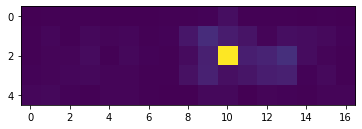

In [8]:
space_bins = bm.space_bin(cs_ts, 50, show_plot = True) #I think this plot is the occupancy plot per bin..?

In [9]:
space_bins

(array([[3.4000e+01, 9.0000e+01, 5.3000e+01, 7.9000e+01, 3.3000e+01,
         4.0000e+00, 3.8000e+01, 8.3000e+01, 8.7000e+01, 1.0500e+02,
         4.6600e+02, 5.3000e+01, 5.4000e+01, 5.3000e+01, 3.3000e+01,
         9.0000e+01, 3.7000e+01],
        [9.3000e+01, 2.0800e+02, 9.4000e+01, 2.6500e+02, 1.6900e+02,
         2.2300e+02, 6.1000e+01, 1.3200e+02, 7.0900e+02, 1.5320e+03,
         8.9700e+02, 6.5800e+02, 1.7500e+02, 4.4200e+02, 4.0100e+02,
         2.9500e+02, 1.2100e+02],
        [6.9000e+01, 1.4400e+02, 1.8400e+02, 3.3200e+02, 7.9000e+01,
         2.4400e+02, 9.7000e+01, 6.8000e+01, 3.4900e+02, 1.0830e+03,
         1.2078e+04, 9.9700e+02, 1.1870e+03, 1.6490e+03, 4.1100e+02,
         1.7500e+02, 5.0000e+01],
        [1.1700e+02, 1.6500e+02, 2.0500e+02, 2.5400e+02, 1.6200e+02,
         1.6200e+02, 5.2000e+01, 4.8000e+01, 5.3900e+02, 1.0920e+03,
         5.0100e+02, 6.8600e+02, 9.4600e+02, 1.0720e+03, 1.0200e+02,
         2.8900e+02, 7.5000e+01],
        [2.2000e+02, 2.4200e+02, 9.5

In [10]:
yedge = space_bins[-1][0]
xedge = space_bins[-1][1]

Make df with rows = miniscope frames, columns = each spatial bin, and values = boolean of whether the animal is in each bin at each frame

In [11]:
##replace any nan values for nose position (i think just a dropped position by cleversys) with the previous row's value 
Ynans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index
Xnans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index

for i in range(0,len(Ynans)):
    yn_indx = Ynans[i]
    prev_yindx = (yn_indx-1)
    cs_ts.at[yn_indx, "NoseY(mm)"] = cs_ts.at[prev_yindx, "NoseY(mm)"]

for j in range(0,len(Xnans)):
    xn_indx = Xnans[j]
    prev_xindx = (xn_indx-1)
    cs_ts.at[xn_indx, "NoseX(mm)"] = cs_ts.at[prev_xindx, "NoseX(mm)"]
    
    
##determine which x and which y bin the animal is in in each frame (=row of cs_ts): 
yloop_leng = (len(yedge)-1)
xloop_leng = (len(xedge)-1)

ybins = {}
ybin_col = []

xbins = {}
xbin_col = []

for value in cs_ts["NoseY(mm)"]:
    for m in range(0,yloop_leng):
        yledge = yedge[m]
        yredge = yedge[m+1]
        if value >= yledge and value < yredge:
            ybin_col.append(m)
        elif m == (yloop_leng-1) and value == yredge:
            ybin_col.append(yloop_leng-1)

            
#issue 220826: xbin_col is dropping a few rows for some reason -- need to figure out
#220904: restarted kernel and reran code - not dropping rows anymore..?
for value in cs_ts["NoseX(mm)"]:
    for m in range(0,xloop_leng):
        xledge = xedge[m]
        xredge = xedge[m+1]
        if value >= xledge and value < xredge:
            xbin_col.append(m)
        elif m == (xloop_leng-1) and value == xredge:
            xbin_col.append(xloop_leng-1) 

In [12]:
##next, append xbin_col and ybin_col to cs_ts

cs_ts['xbin'] = xbin_col
cs_ts['ybin'] = ybin_col

print(cs_ts) 


       CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  EventRule1  EventRule2  \
0            562.0        234.0      512.0      214.0           0           0   
1            561.0        234.0      512.0      215.0           0           0   
2            561.0        235.0      512.0      214.0           0           0   
3            560.0        236.0      512.0      214.0           0           0   
4            559.0        231.0      512.0      214.0           0           0   
...            ...          ...        ...        ...         ...         ...   
35745        756.0        270.0      814.0      277.0           0           0   
35746        756.0        270.0      815.0      276.0           0           0   
35747        756.0        270.0      815.0      279.0           0           0   
35748        753.0        272.0      816.0      279.0           0           0   
35749        753.0        272.0      816.0      281.0           0           0   

       EventRule3  EventRul

In [61]:
dist = np.asarray(cs_ts["distance_traveled"]) #i believe the units of distance_traveled are mm - just a euclidean distance calculation

time = np.asarray(cs_ts["Time Stamp (ms)"])

#come up with fake timestamp (same step size as to the following timestamp) just before start of real timestamps
prepend_step = time[1] - time[0]
prepend_time = time[0] - prepend_step

time_new = np.insert(time, 0, prepend_time) #prepend fake timestamp to beginning of time array to make calculation of dt same length as rest of data
dTime = np.diff(time_new)

#instantaneous velocity
inst_velo = dist/dTime #mm/ms = m/s
inst_velo


array([0.04159452, 0.02941176, 0.02941176, ..., 0.        , 0.02941176,
       0.        ])

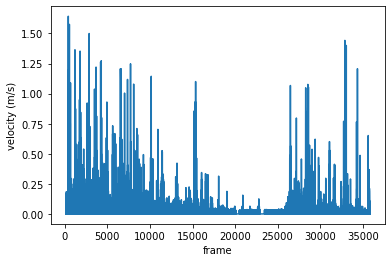

In [62]:
#plot
plt.plot(cs_ts["Frame Number"], inst_velo)
plt.xlabel("frame")
plt.ylabel("velocity (m/s)")
plt.show()

In [79]:
from scipy.ndimage import gaussian_filter1d

#smoothed velocity
#sigma = 2 (somewhat arbitrarily chosen; means velocity is smoothed over five frames (~=50 ms)))
smooth_velo = gaussian_filter1d(inst_velo,2)
smooth_velo

#velocity threshold for filtering - borrowing 10 cm/s = 0.1 m/s from shuman et al 20 (disterhoft uses 12 cm/s, dragoi + tonegawa use 5)
velo_thresh = 0.1
#add boolean column to cs_ts w/ whether that frame passes the velocity threshold or not for later place cell analysis
running = smooth_velo > velo_thresh
running = running.astype(int)


array([0, 0, 0, ..., 0, 0, 0])

In [83]:
#append velocity values to cs_ts
cs_ts['inst_velo'] = inst_velo
cs_ts['smooth_velo'] = smooth_velo
cs_ts['running'] = running
cs_ts_run = cs_ts[cs_ts['running']==1]
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,2D_bin,inst_velo,smooth_velo,running
0,562.0,234.0,512.0,214.0,0,0,1,0,0,0,...,1.414214,115,3868,182,7,1,"7,1",0.041595,0.040046,0
1,561.0,234.0,512.0,215.0,0,0,1,0,0,0,...,1.000000,116,3902,183,7,1,"7,1",0.029412,0.043336,0
2,561.0,235.0,512.0,214.0,0,0,1,0,0,0,...,1.000000,117,3936,185,7,1,"7,1",0.029412,0.048489,0
3,560.0,236.0,512.0,214.0,0,0,1,0,0,0,...,1.414214,118,3967,186,7,1,"7,1",0.045620,0.051848,0
4,559.0,231.0,512.0,214.0,0,0,1,0,0,0,...,6.082763,119,4003,188,7,1,"7,1",0.168966,0.049157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,756.0,270.0,814.0,277.0,0,0,1,0,1,0,...,0.000000,35860,1204060,56513,13,2,"13,2",0.000000,0.004074,0
35746,756.0,270.0,815.0,276.0,0,0,1,0,1,0,...,0.000000,35861,1204092,56515,13,2,"13,2",0.000000,0.004675,0
35747,756.0,270.0,815.0,279.0,0,0,1,0,1,0,...,0.000000,35862,1204126,56516,13,2,"13,2",0.000000,0.006247,0
35748,753.0,272.0,816.0,279.0,0,0,1,0,1,0,...,1.000000,35863,1204160,56518,13,2,"13,2",0.029412,0.007841,0


In [82]:
cs_ts_run

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,2D_bin,inst_velo,smooth_velo,running
65,576.0,247.0,539.0,241.0,0,0,1,0,0,0,...,5.385165,180,6083,285,7,2,"7,2",0.153862,0.100926,1
241,573.0,246.0,536.0,239.0,0,0,1,0,0,0,...,2.000000,356,11989,563,7,2,"7,2",0.064516,0.118131,1
242,557.0,239.0,564.0,211.0,0,0,1,0,0,0,...,15.652476,357,12022,564,8,1,"8,1",0.474317,0.130693,1
243,561.0,240.0,566.0,210.0,0,0,1,0,0,0,...,1.000000,358,12081,567,8,1,"8,1",0.016949,0.123538,1
244,562.0,240.0,566.0,210.0,0,0,1,0,0,0,...,1.000000,359,12096,568,8,1,"8,1",0.066667,0.102933,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35528,767.0,257.0,806.0,265.0,0,0,1,0,1,0,...,4.123106,35643,1196775,56171,12,2,"12,2",0.124943,0.175975,1
35529,764.0,259.0,797.0,264.0,0,0,1,0,1,0,...,6.000000,35644,1196809,56173,12,2,"12,2",0.176471,0.143474,1
35530,763.0,260.0,794.0,254.0,0,0,1,0,1,0,...,1.414214,35645,1196842,56174,12,2,"12,2",0.042855,0.125006,1
35531,768.0,258.0,809.0,266.0,0,1,0,0,0,0,...,2.236068,35646,1196875,56176,13,2,"13,2",0.067760,0.115472,1


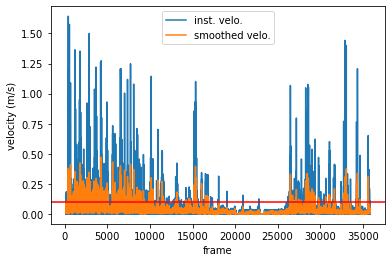

In [75]:
#overlay thresh and smooth velo on plot
plt.plot(cs_ts["Frame Number"], inst_velo, label = "inst. velo.")
plt.plot(cs_ts["Frame Number"], smooth_velo, label = "smoothed velo.")
plt.xlabel("frame")
plt.ylabel("velocity (m/s)")
plt.axhline(y=velo_thresh, color='red')
plt.legend()
plt.show()

In [13]:
#get number of bins produced above
nybins = (len(yedge)-1)
nxbins = (len(xedge)-1)

#create structure with every possible combination of values for x and y bins,
#and order those combinations as all x, then all y (i.e., [0,0], [0,1], [0,2]... [8,0], [8,1]...)

bins_2d = []

xbin_vals = range(len(xedge))
ybin_vals = range(len(yedge))
for n in xbin_vals:
    for m in ybin_vals:
        x = str(xbin_vals[n])
        y = str(ybin_vals[m])
        xy_list = [x,y]
        xy = ','.join(xy_list)
        bins_2d.append(xy)
        
#        bins_2d.append((n,m))




#generate new column of cs_ts called 2D_bin, write for loop going through xbin and ybin columns and 
#assigning value of each row as ([xbin_val, ybin_val]) 
#(in identical format to the array created in previous step of all possible bins)

twod_bins = []

mnop = range(len(xbin_col))
for n in mnop:
    x = str(xbin_col[n])
    y = str(ybin_col[n])
    xy_list = [x,y]
    xy = ','.join(xy_list)
    twod_bins.append(xy)

cs_ts['2D_bin'] = twod_bins
    
#create empty df with columns = the array of all possible bins and rows = miniscope frames
occ_df = pd.DataFrame({"frame":cs_ts["Frame Number"]})
for i in range(len(bins_2d)):
    col_name = bins_2d[i]
    occ_df.loc[:,col_name] = 0

#populate empty df with binaries of what 2D_bin was generated for cs_ts (so value is either 0 or 1)
nrow = range(len(cs_ts))
for i in nrow:
    dd_bin = cs_ts["2D_bin"][i]
    occ_df.loc[i, dd_bin] = 1
    
#occ_df is now the df with the boolean for each spatial bin on a frame-by-frame basis

C:\Users\sheer\AppData\Local\Temp\ipykernel_5936\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_5936\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_5936\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

In [14]:
occ_df

,frame,"0,0","0,1","0,2","0,3","0,4","0,5","1,0","1,1","1,2",...,"16,2","16,3","16,4","16,5","17,0","17,1","17,2","17,3","17,4","17,5"
0,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,35860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35746,35861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35747,35862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35748,35863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#check correct binning by column, e.g.,
occ_df["13,2"]

0        0
1        0
2        0
3        0
4        0
        ..
35745    1
35746    1
35747    1
35748    1
35749    1
Name: 13,2, Length: 35750, dtype: int64

In [ ]:
#first part (above) - make the boolean for spatial bins -- done through 3 of 220929

#1) define bins
    #doing this based on animal's position. in my experience, animals will touch each wall during their behavior,
    #so i am using their max nose position to define the bounds of the chamber. From cleversys, the x length
    #of the chamber should be identical between sessions (if you set it correctly) but the y length may differ
    #given slight variations in the distortion of the camera
    #plan to use the same number of bins across sessoins, bc we will output the total number of bins the animal went into to
    #get a vague sense of whether the animal fully explored the space or not
    
#2) filter occupancy by a velocity threshold 

#3) frame-by-frame boolean for bin occupancy



#4) place cell (maybe best for a new script) -have not yet started as of 

#also should smooth both neural activity and occupancy by gaussian kernel (same sigma value for both) per disterhoft and shuman

In [ ]:
#second part - per AK, for loading into bento (have not yet started as of 220904)

#"organize your bin "bouts" into a struct with structure bouts.Ch1.(bin_ID) 
# [to] be able to pass that struct to Bento's saveAnnot function to output them in a .annot format 
# that could automatically be loaded into Bento

In case you want to analyze outside of Bento: slicing out the miniscope frames during partner/novel social interaction (xreference to your minian .mat file for analysis)

In [ ]:
#slice out the miniscope frames during which the test animal was interacting with either the novel or partner animal

interact_frames = cs_ts[['Frame Number','huddle_novel',
                         'huddle_partner',
                         'novel_dist_less_10cm',
                         'partner_dist_less_10cm',
                         'distance_to_novel',
                         'distance_to_partner']]

interact_frames

nhuddle_frames = interact_frames[interact_frames['huddle_novel']==1]
nhuddle_frames = nhuddle_frames[['Frame Number', 'huddle_novel']]

phuddle_frames = interact_frames[interact_frames['huddle_partner']==1]
phuddle_frames = phuddle_frames[['Frame Number', 'huddle_partner']]

ninteract_frames = interact_frames[interact_frames['novel_dist_less_10cm']==1]
ninteract_frames = ninteract_frames[['Frame Number', 'novel_dist_less_10cm']]

pinteract_frames = interact_frames[interact_frames['partner_dist_less_10cm']==1]
pinteract_frames = pinteract_frames[['Frame Number', 'partner_dist_less_10cm']]